In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unet with jaccard index as metric and binary cross entropy as loss function


In [27]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def unet_model_original3(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    
    #contraction
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    c1 = Dropout(0.2)(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    c2 = Dropout(0.2)(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    c3 = Dropout(0.2)(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    c4 = Dropout(0.2)(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    c5 = Dropout(0.2)(c5)
    #expansion
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    c6 = Dropout(0.2)(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    c7 = Dropout(0.2)(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    c8 = Dropout(0.2)(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    c9 = Dropout(0.2)(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[jaccard_coef])
    # model.summary()
    
    return model


Unet with jaccard index as metric and jaccard loss  as loss function

In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from tensorflow.keras import backend as K


def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jaccard_loss(y_true, y_pred):
    return -jaccard_coef(y_true, y_pred)


learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# model.compile(optimizer=optimizer, loss='categorical_crossentropy')

def unet_model_original_jakkard1(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    
    #contraction
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #expansion
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=optimizer, loss=[jaccard_loss], metrics=[jaccard_coef])
    # model.summary()
    
    return model

Unet with jaccard index as metric and focal loss as loss function

In [68]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from focal_loss import BinaryFocalLoss
smooth = 1e-5
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)


# learning_rate = 0.1
# momentum = 0.9
# optimizer=SGD(lr=learning_rate, momentum=momentum)
# model.compile()
# Dice Coefficient function

def jaccard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# def dice_coef(self, y_true, y_pred):
#         y_true_f = K.flatten(y_true)
#         y_pred_f = K.flatten(y_pred)
#         intersection = K.sum(y_true_f * y_pred_f)
#         return (2. * intersection + K.epsilon()) / (
#                 K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

# # Dice Loss function
# def dice_loss(y_true, y_pred):
#     return  -dice_coefficient(y_true, y_pred)




def unet_model_original_focal_loss(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    
    #contraction
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    c1 = Dropout(0.2)(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    c2 = Dropout(0.2)(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    c3 = Dropout(0.2)(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    c4 = Dropout(0.2)(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    c5 = Dropout(0.2)(c5)
    #expansion
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    c6 = Dropout(0.2)(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    c7 = Dropout(0.2)(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    c8 = Dropout(0.2)(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    c9 = Dropout(0.2)(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=optimizer, loss=[BinaryFocalLoss(gamma=3)], metrics=[jaccard_coef])
    # model.summary()
    
    return model










loading data

272


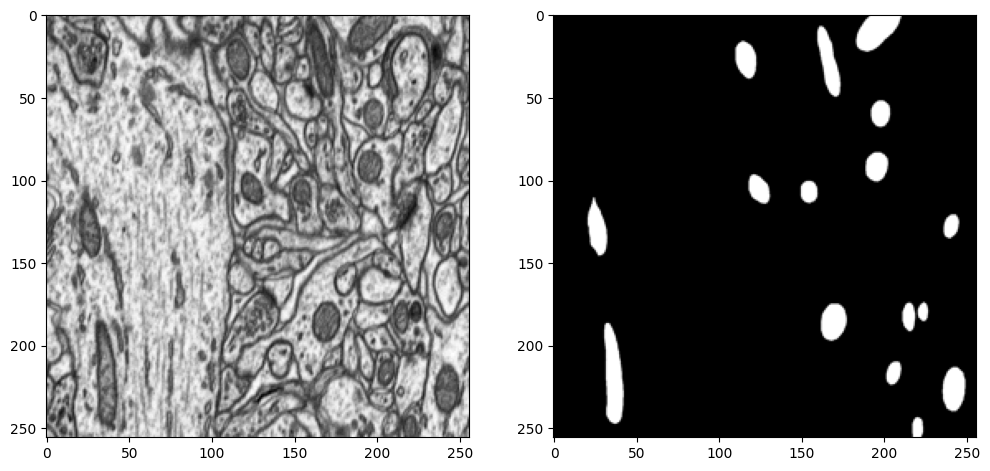

In [107]:
# from simple_unet_model import simple_unet_model   #Use normal unet model
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import numpy as np
import tensorflow as tf
import random as rn

# np.random.seed(42)
# rn.seed(42)
# tf.random.set_seed(42)


image_directory = '/content/drive/MyDrive/mitochandria_dataset_2/images/'
mask_directory = '/content/drive/MyDrive/mitochandria_dataset_2/masks/'
SIZE = 256
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=1
# image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
# mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

n=330
image_dataset= [None for _ in range(n)]
mask_dataset= [None for _ in range(n)]
images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory+image_name, 0)
        # print(image_directory+image_name)
        image = Image.fromarray(image)
        image = image.resize((IMG_HEIGHT, IMG_WIDTH))
        # image_dataset.append(np.array(image))
        index=int(image_name.split('.')[0].split('_')[1])
        image_dataset[index]=np.array(image)
#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        # print(mask_directory+image_name)
        image = Image.fromarray(image)
        image = image.resize((IMG_HEIGHT, IMG_WIDTH))
        # mask_dataset.append(np.array(image))
        index=int(image_name.split('.')[0].split('_')[1])
        mask_dataset[index]=np.array(image)

# print(image_dataset.shape,mask)


import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.show()

In [108]:
#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

splitting the data

145


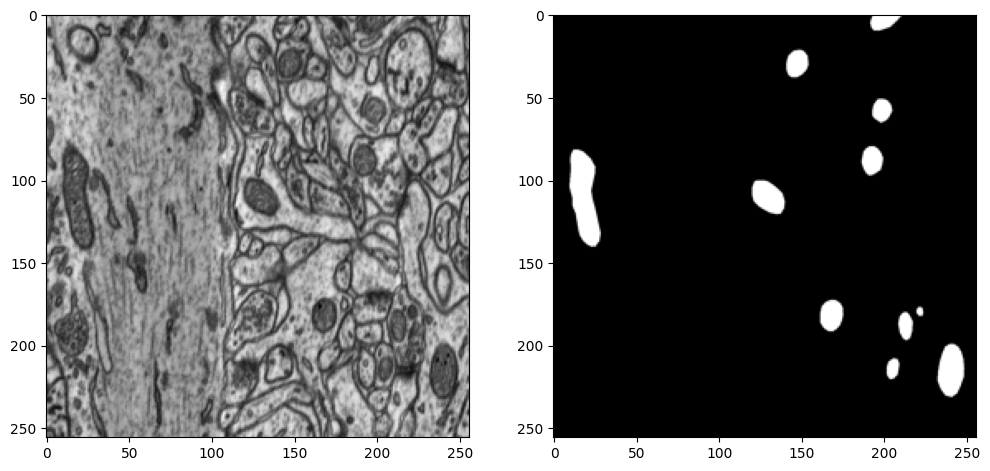

In [110]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = True)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
# for i in range(0,50):
print(image_number)
  # image_number=i
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (IMG_HEIGHT, IMG_WIDTH)), cmap='gray')
plt.show()



In [115]:
def get_model(model_name,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS):
  if(model_name=="unet_model_original3"):
    return unet_model_original3(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
  if(model_name=="unet_model_original_jakkard1"):
    return unet_model_original_jakkard1(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
  if(model_name=="unet_model_original_focal_loss"):
    return unet_model_original_focal_loss(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    
def train_model(model_name,epochs,batchSize):
  IMG_HEIGHT = image_dataset.shape[1]
  IMG_WIDTH  = image_dataset.shape[2]
  IMG_CHANNELS = image_dataset.shape[3]
  model = get_model(model_name,IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
  history = model.fit(X_train, y_train, batch_size = batchSize, verbose=1,validation_data=(X_test,y_test), epochs=epochs, shuffle=True)
  model_weights_name=model_name+'.hdf5'
  model.save(model_weights_name)
  _, acc = model.evaluate(X_test, y_test)
  print("Accuracy = ", (acc * 100.0), "%")

  #plot the training and validation accuracy and loss at each epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # acc = history.history['acc']
  acc = history.history['jaccard_coef']
  # val_acc = history.history['val_acc']
  val_acc = history.history['val_jaccard_coef']

  plt.plot(epochs, acc, 'y', label='Training jaccard_coef')
  plt.plot(epochs, val_acc, 'r', label='Validation jaccard_coef')
  plt.title('Training and validation jaccard_coef')
  plt.xlabel('Epochs')
  plt.ylabel('jaccard_coef')
  plt.legend()
  plt.show()
  return model


def findIOU(y_pred,X_test,y_test):
  y_pred_thresholded = y_pred > 0.5
  intersection = np.logical_and(y_test, y_pred_thresholded)
  union = np.logical_or(y_test, y_pred_thresholded)
  iou_score = np.sum(intersection) / np.sum(union)
  print("IoU socre is: ", iou_score)


def display_images(X_test,y_test,y_pred):
  for i in range(5):
    image_number = i+5
    plt.figure(figsize=(12, 6))
    # plt.subplot(121)
    # plt.imshow(np.reshape(X_test[image_number], (256, 256)), cmap='gray')
    plt.subplot(121)
    plt.imshow(np.reshape(y_test[image_number], (256, 256)), cmap='gray')
    plt.subplot(122)
    plt.imshow(np.reshape(y_pred[image_number], (256, 256)), cmap='gray')
    plt.show()
def display_images_comparison(X_test,y_test,y_pred_thresholded_binary_cross_entropy,y_pred_thresholded_focal_loss):
  for i in range(5):
    image_number = i+5
    fig, ax = plt.subplots(1, 4, figsize=(12, 4)) # Create a 1x3 grid of subplots

    # Plot the first image in the first subplot
    ax[0].imshow(X_test[image_number], cmap='gray')
    ax[0].set_title('orig_image')

    # Plot the second image in the second subplot
    ax[1].imshow(y_test[image_number], cmap='gray')
    ax[1].set_title('orig_mask')

    # Plot the second image in the second subplot
    ax[2].imshow(y_pred_thresholded_binary_cross_entropy[image_number], cmap='gray')
    ax[2].set_title('pred_mask(bce)')
    # Plot the third image in the third subplot
    ax[3].imshow(y_pred_thresholded_focal_loss[image_number], cmap='gray')
    ax[3].set_title('pred_mask(focal)')
    plt.show()


Training Unet with binary cross entropy loss for 50 epochs


In [30]:
model=train_model("unet_model_original3",50,16)
y_pred=model.predict(X_test)
findIOU(y_pred,X_test,y_test)

Epoch 1/50
17/17 [==============================] - 30s 1s/step - loss: 7.5846 - jaccard_coef: 0.0467 - val_loss: 0.5738 - val_jaccard_coef: 0.0526
Epoch 2/50
17/17 [==============================] - 16s 948ms/step - loss: 0.4320 - jaccard_coef: 0.0492 - val_loss: 0.2033 - val_jaccard_coef: 0.0430
Epoch 3/50
17/17 [==============================] - 16s 939ms/step - loss: 0.2099 - jaccard_coef: 0.0382 - val_loss: 0.1976 - val_jaccard_coef: 0.0412
Epoch 4/50
17/17 [==============================] - 16s 958ms/step - loss: 0.2024 - jaccard_coef: 0.0389 - val_loss: 0.1954 - val_jaccard_coef: 0.0408
Epoch 5/50
17/17 [==============================] - 16s 957ms/step - loss: 0.1974 - jaccard_coef: 0.0400 - val_loss: 0.1904 - val_jaccard_coef: 0.0432
Epoch 6/50
17/17 [==============================] - 16s 960ms/step - loss: 0.1888 - jaccard_coef: 0.0444 - val_loss: 0.1863 - val_jaccard_coef: 0.0522
Epoch 7/50
17/17 [==============================] - 16s 965ms/step - loss: 0.1692 - jaccard_coef:

Training Unet with binary cross entropy loss for 50 more epochs

In [33]:
# Load the saved weights
# model = get_model("unet_model_original2",IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
model.load_weights('/content/unet_model_original3.hdf5')

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[jaccard_coef])

# Train the model for more epochs
history=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
model_weights_name="unet_model_original3_extra50epochs"+'.hdf5'
model.save(model_weights_name)
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


Epoch 1/50
9/9 [==============================] - 47s 2s/step - loss: 0.0168 - jaccard_coef: 0.8220 - val_loss: 0.0195 - val_jaccard_coef: 0.7848
Epoch 2/50
9/9 [==============================] - 18s 2s/step - loss: 0.0164 - jaccard_coef: 0.8265 - val_loss: 0.0199 - val_jaccard_coef: 0.7806
Epoch 3/50
9/9 [==============================] - 18s 2s/step - loss: 0.0163 - jaccard_coef: 0.8277 - val_loss: 0.0195 - val_jaccard_coef: 0.7849
Epoch 4/50
9/9 [==============================] - 18s 2s/step - loss: 0.0163 - jaccard_coef: 0.8265 - val_loss: 0.0193 - val_jaccard_coef: 0.7882
Epoch 5/50
9/9 [==============================] - 18s 2s/step - loss: 0.0162 - jaccard_coef: 0.8283 - val_loss: 0.0193 - val_jaccard_coef: 0.7867
Epoch 6/50
9/9 [==============================] - 18s 2s/step - loss: 0.0161 - jaccard_coef: 0.8293 - val_loss: 0.0204 - val_jaccard_coef: 0.7828
Epoch 7/50
9/9 [==============================] - 18s 2s/step - loss: 0.0160 - jaccard_coef: 0.8287 - val_loss: 0.0187 - val

Results on testing images along with IOU score

3/3 [==============================] - 1s 425ms/step
IoU socre is:  0.8444481791540183


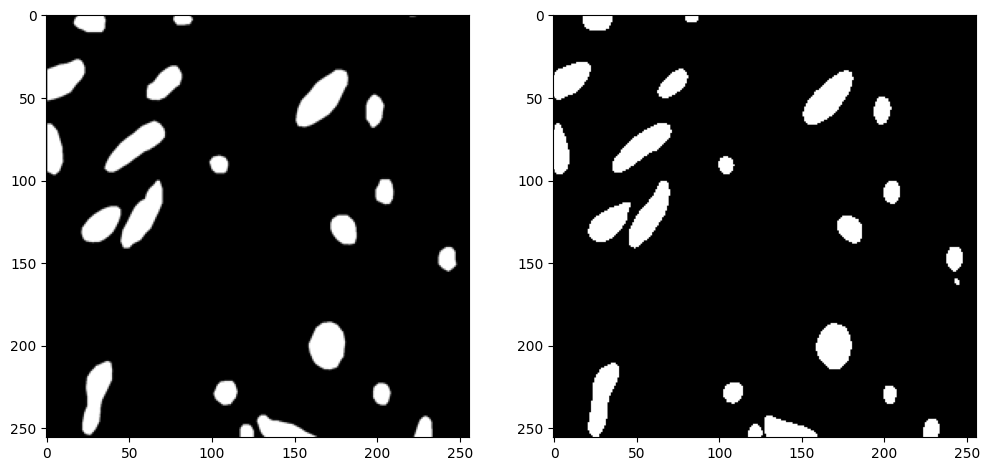

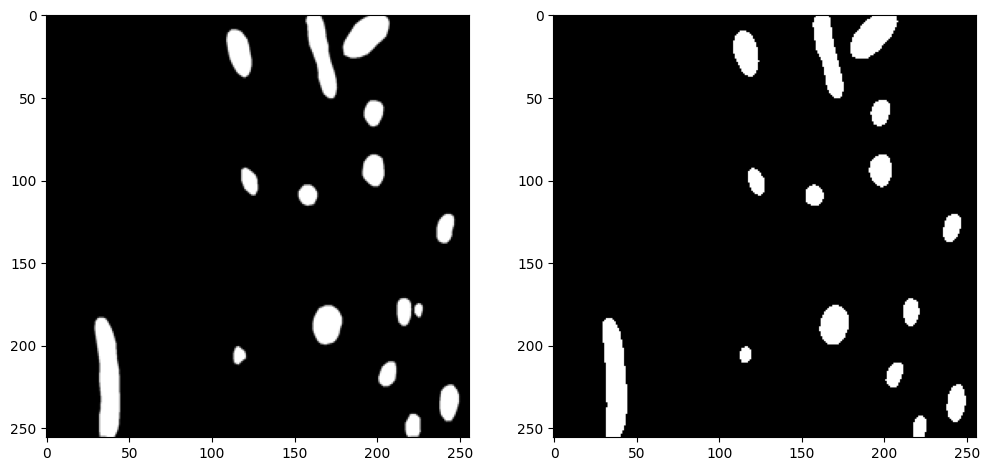

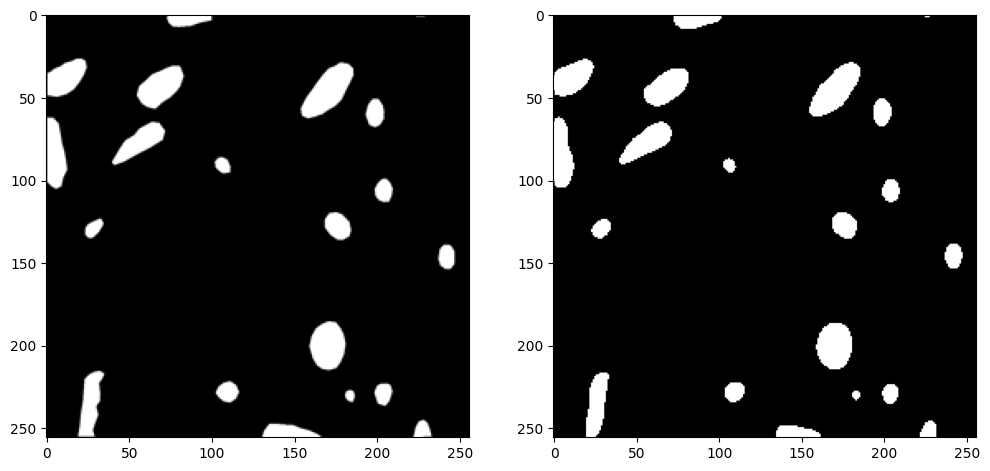

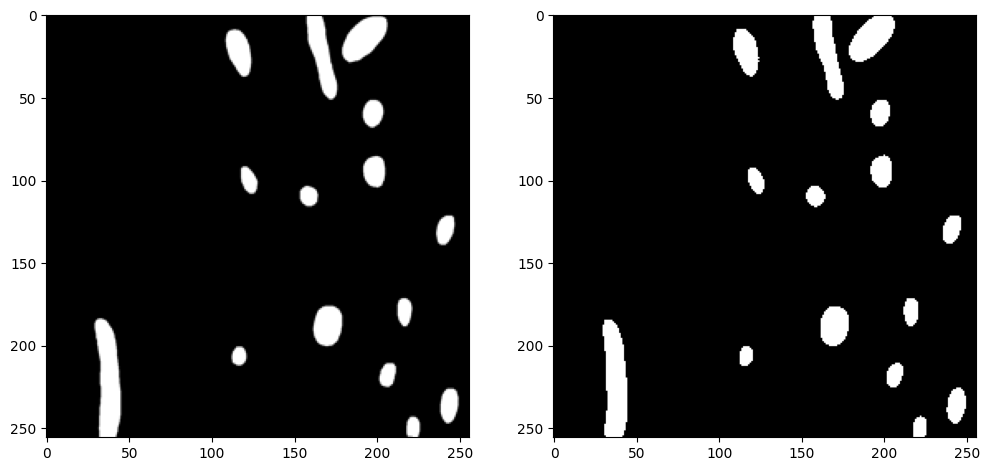

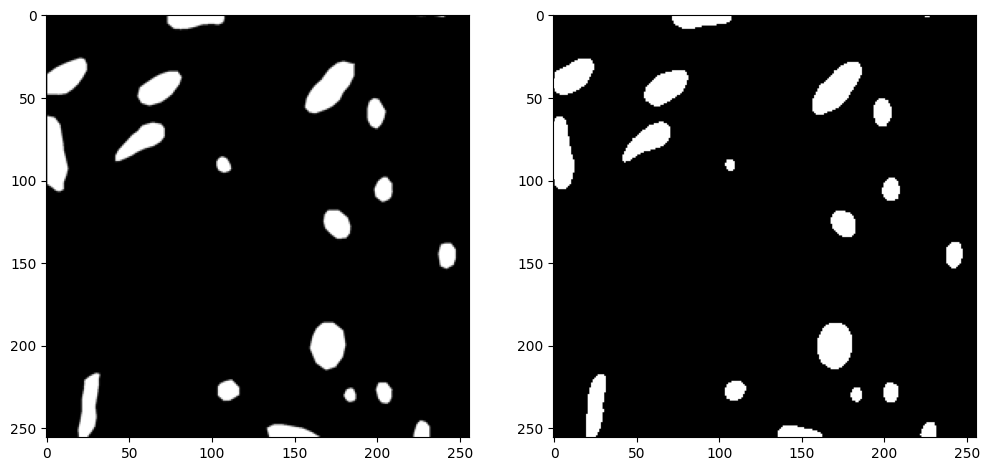

In [58]:
y_pred=model.predict(X_test)
findIOU(y_pred,X_test,y_test)
y_pred_thresholded_binary_cross_entropy = y_pred > 0.5
# print(y_pred.shape)
# print(y_pred_thresholded.shape)
display_images(X_test,y_test,y_pred_thresholded_binary_cross_entropy)

loss and metric graphs

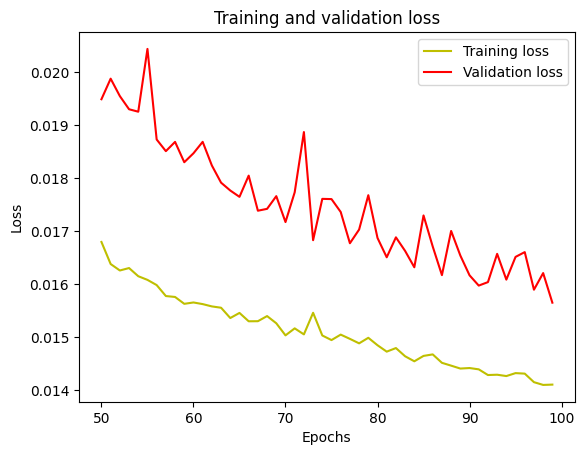

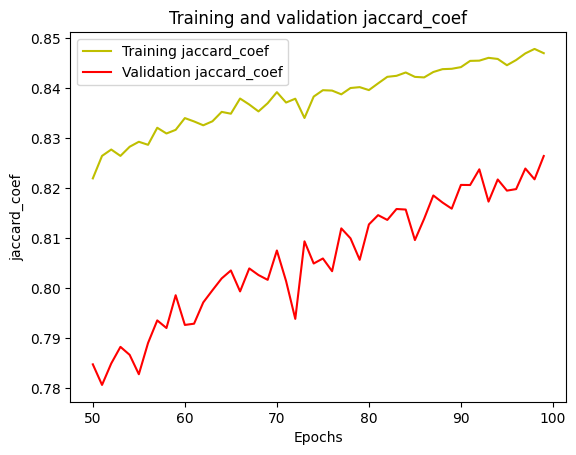

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(50, 50+len(loss) )
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# acc = history.history['acc']
acc = history.history['jaccard_coef']
# val_acc = history.history['val_acc']
val_acc = history.history['val_jaccard_coef']

plt.plot(epochs, acc, 'y', label='Training jaccard_coef')
plt.plot(epochs, val_acc, 'r', label='Validation jaccard_coef')
plt.title('Training and validation jaccard_coef')
plt.xlabel('Epochs')
plt.ylabel('jaccard_coef')
plt.legend()
plt.show()

unet model with focal loss

In [51]:
model_dice=train_model("unet_model_original_focal_loss",50,16)
y_pred=model_dice.predict(X_test)
findIOU(y_pred,X_test,y_test)

Epoch 1/50
17/17 [==============================] - 20s 944ms/step - loss: 0.0896 - jaccard_coef: 0.0502 - val_loss: 0.0597 - val_jaccard_coef: 0.0547
Epoch 2/50
17/17 [==============================] - 16s 945ms/step - loss: 0.0755 - jaccard_coef: 0.0523 - val_loss: 0.0605 - val_jaccard_coef: 0.0550
Epoch 3/50
17/17 [==============================] - 15s 905ms/step - loss: 0.0577 - jaccard_coef: 0.0526 - val_loss: 0.0588 - val_jaccard_coef: 0.0558
Epoch 4/50
17/17 [==============================] - 16s 925ms/step - loss: 0.0557 - jaccard_coef: 0.0536 - val_loss: 0.0569 - val_jaccard_coef: 0.0575
Epoch 5/50
17/17 [==============================] - 15s 899ms/step - loss: 0.0531 - jaccard_coef: 0.0571 - val_loss: 0.0525 - val_jaccard_coef: 0.0647
Epoch 6/50
17/17 [==============================] - 16s 924ms/step - loss: 0.0533 - jaccard_coef: 0.0626 - val_loss: 0.0526 - val_jaccard_coef: 0.0643
Epoch 7/50
17/17 [==============================] - 15s 900ms/step - loss: 0.0492 - jaccard_co

Results on testing images along with IOU score 

3/3 [==============================] - 1s 416ms/step
IoU socre is:  0.919047005183597


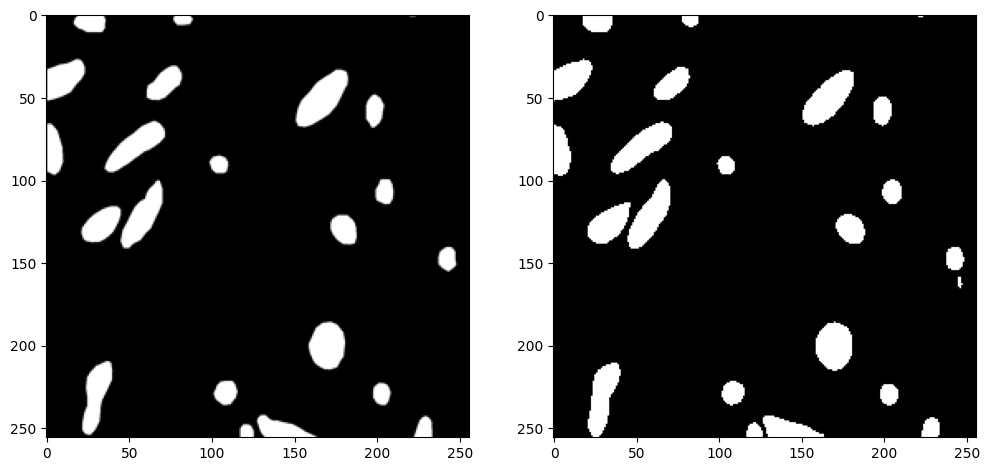

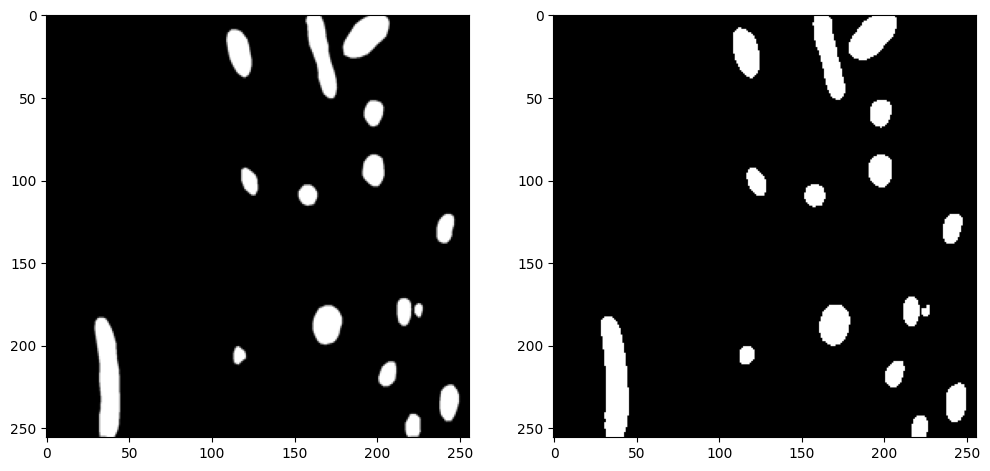

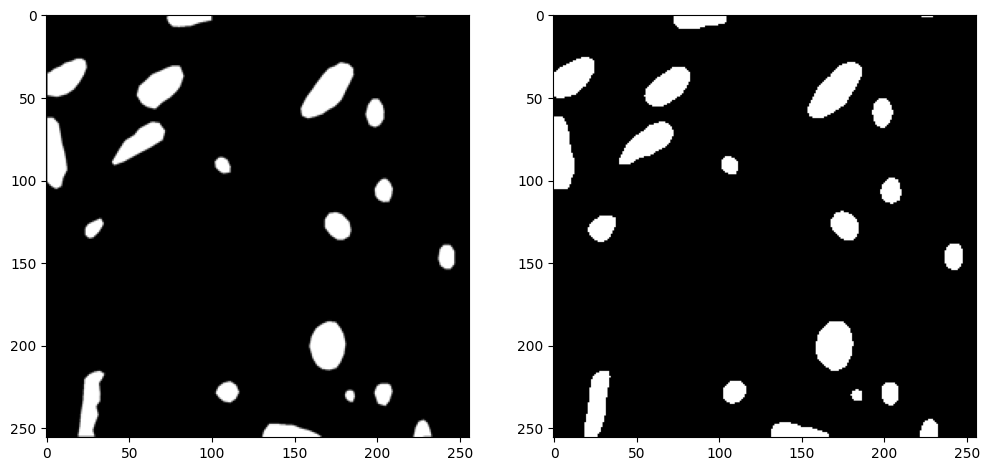

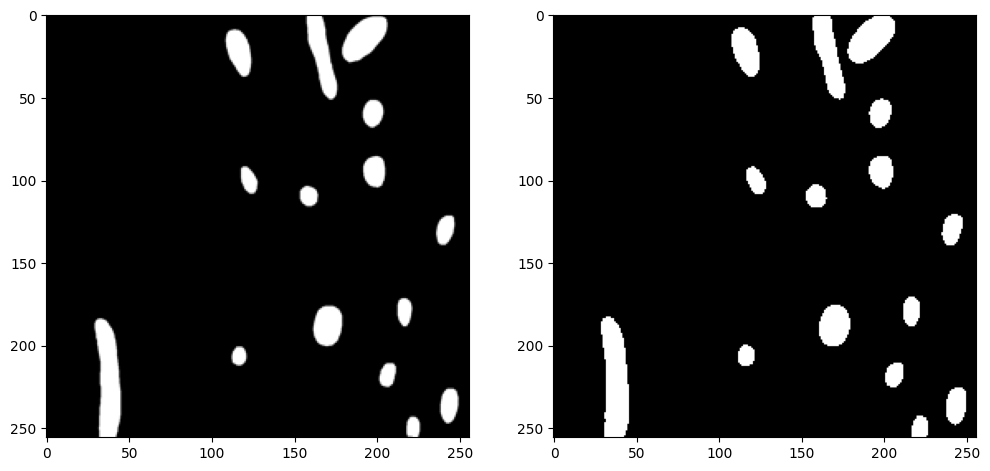

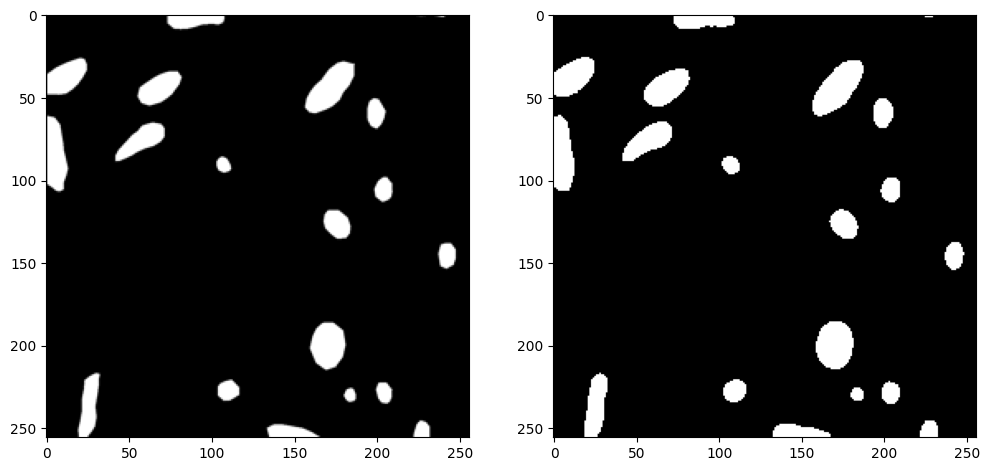

In [59]:
y_pred=model_dice.predict(X_test)
findIOU(y_pred,X_test,y_test)
y_pred_thresholded_focal_loss = y_pred > 0.5
# print(y_pred.shape)
# print(y_pred_thresholded.shape)
display_images(X_test,y_test,y_pred_thresholded_focal_loss)

comparison of images between models of binary cross entropy and focal loss

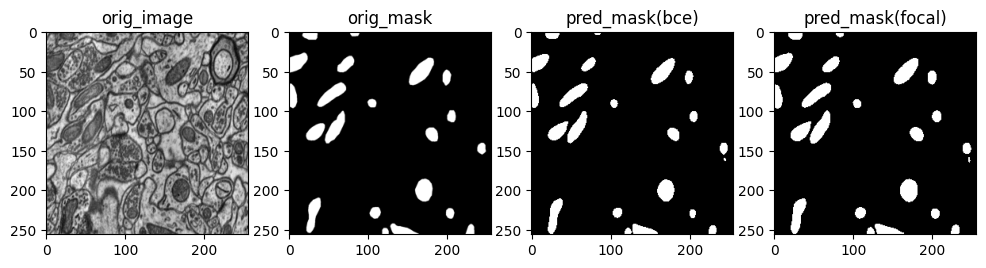

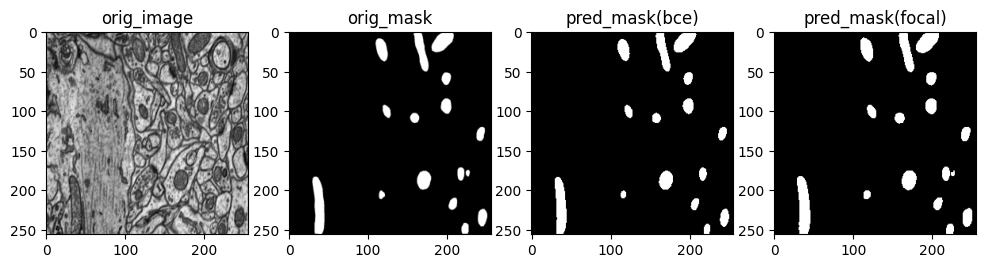

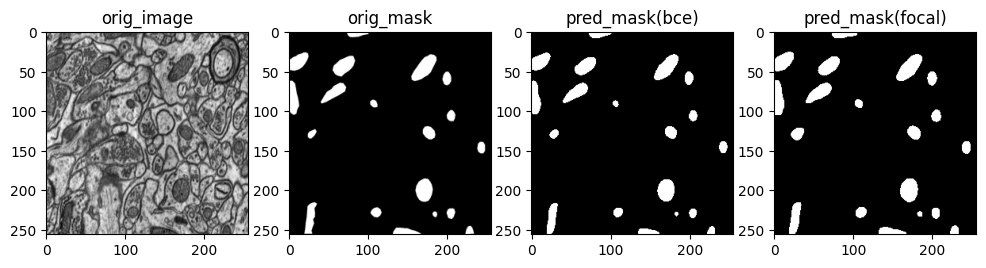

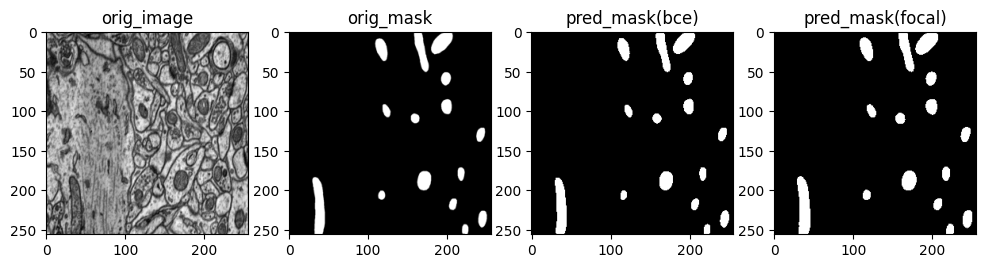

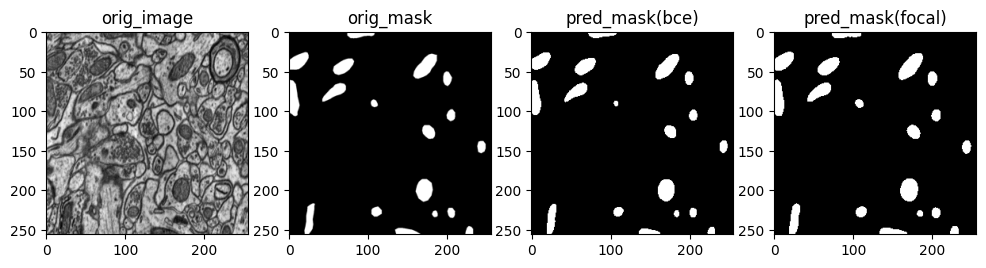

In [63]:
display_images(X_test,y_test,y_pred_thresholded_binary_cross_entropy,y_pred_thresholded_focal_loss)